In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy.stats import norm, skew  #获取统计信息
from scipy import stats # 离散统计分布以及连续统计分布
import seaborn as sns  # 绘图包
from sklearn.preprocessing import LabelEncoder
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [5]:
train_data.drop("Id", axis=1, inplace=True)
test_data.drop("Id", axis=1, inplace=True)

In [6]:
train_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

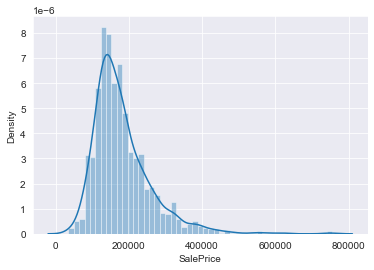

In [7]:
sns.distplot(train_data['SalePrice'])

In [8]:
# 计算房价的峰度和偏度
SP_skew = train_data['SalePrice'].skew()
SP_kurt = train_data['SalePrice'].kurt()
print('峰度：',SP_skew)
print('偏度：',SP_kurt)

峰度： 1.8828757597682129
偏度： 6.536281860064529


In [9]:
print(train_data['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [10]:
num_features = []
cate_features = []
for col in test_data.columns:
    if test_data[col].dtype == 'object':
        cate_features.append(col)
    else:
        num_features.append(col)
print('数值型特征：', len(num_features))
print('类别型特征：', len(cate_features))

数值型特征： 36
类别型特征： 43


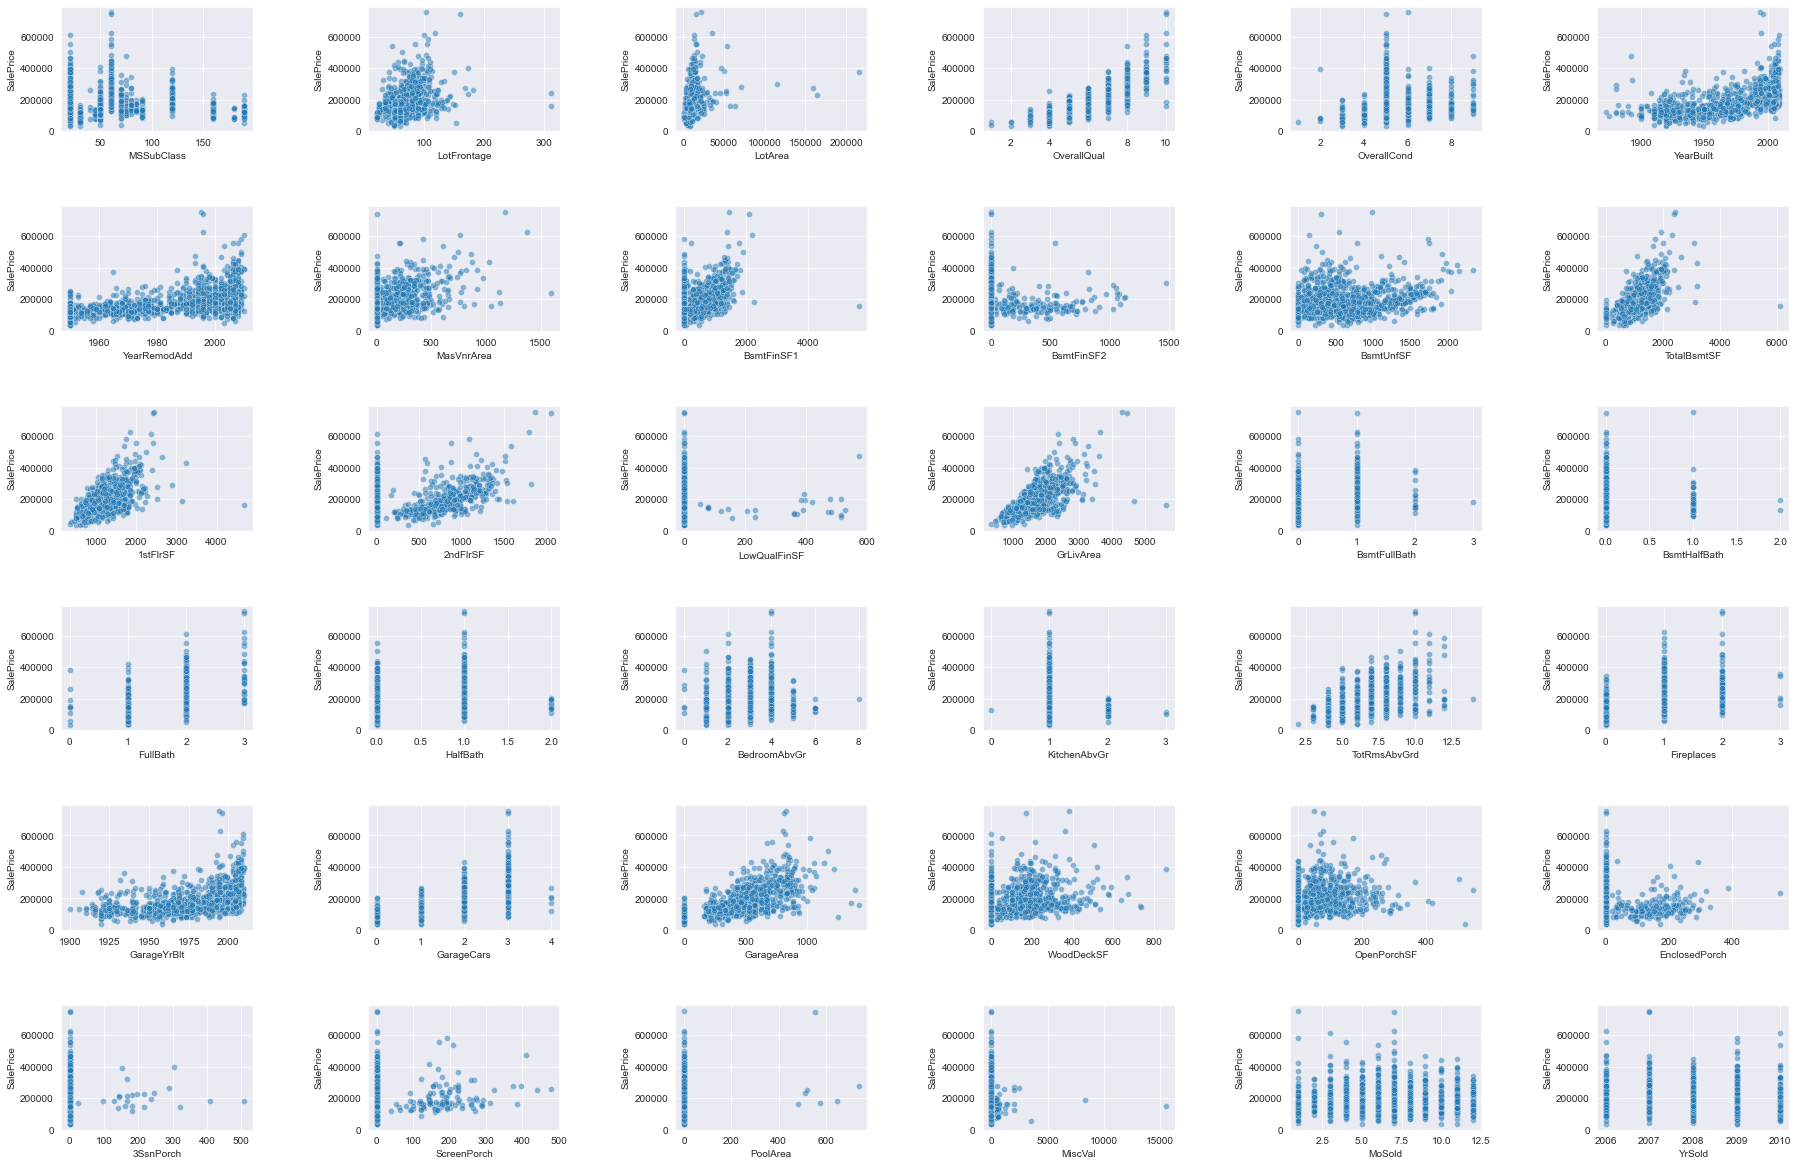

In [11]:
plt.figure(figsize=(30, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, wspace=0.6, hspace=0.6)
for i, feature in enumerate(num_features):
    plt.subplot(6, 6, i + 1)
    sns.scatterplot(x=feature, y='SalePrice', data=train_data, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')


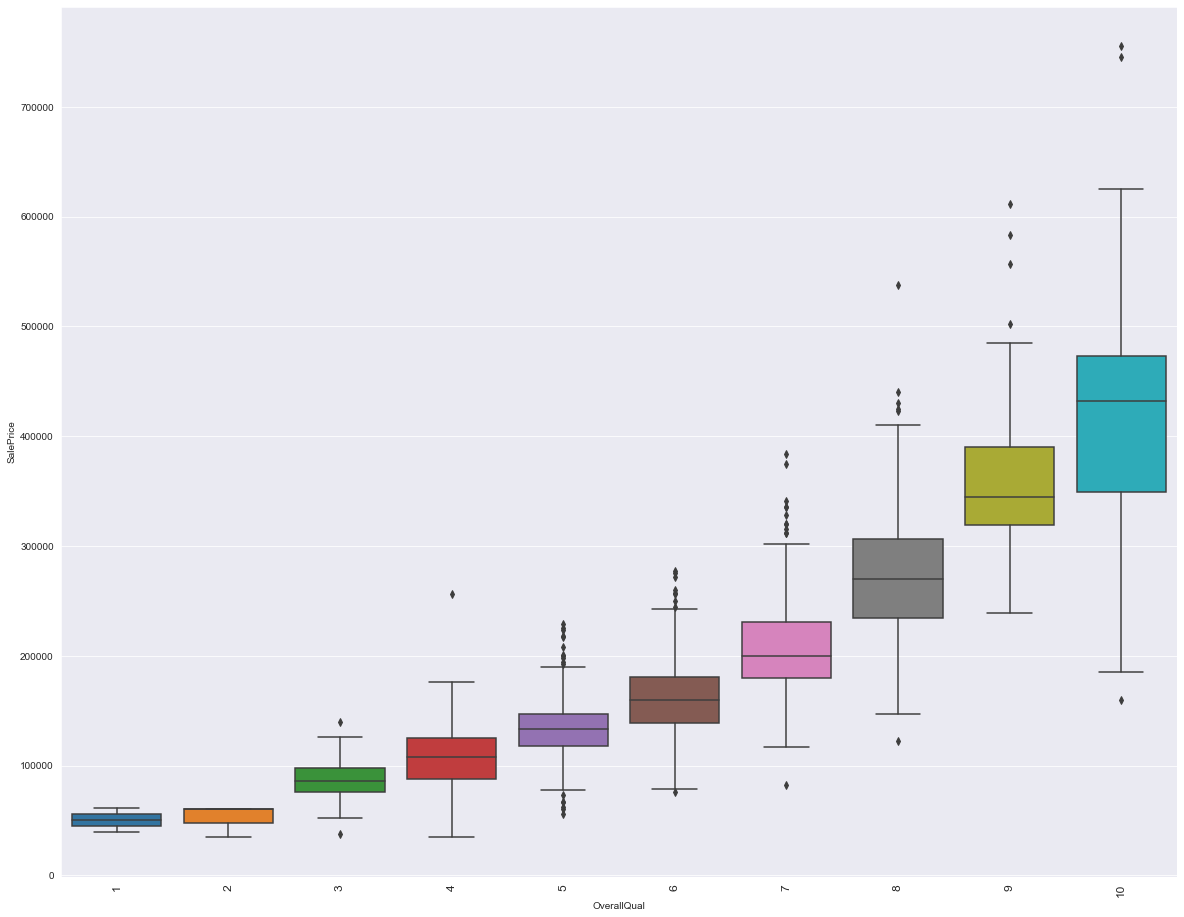

In [12]:
plt.figure(figsize=(20, 16))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.xticks(rotation=90, fontsize=12)
plt.show()

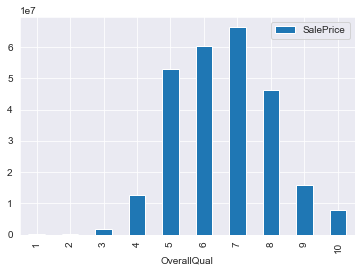

In [13]:
#柱状图
OverallQual_SalePrice = train_data[['OverallQual','SalePrice']].groupby(['OverallQual']).sum().sort_values(by='OverallQual',ascending=True)
OverallQual_SalePrice.plot(kind='bar')
plt.show()

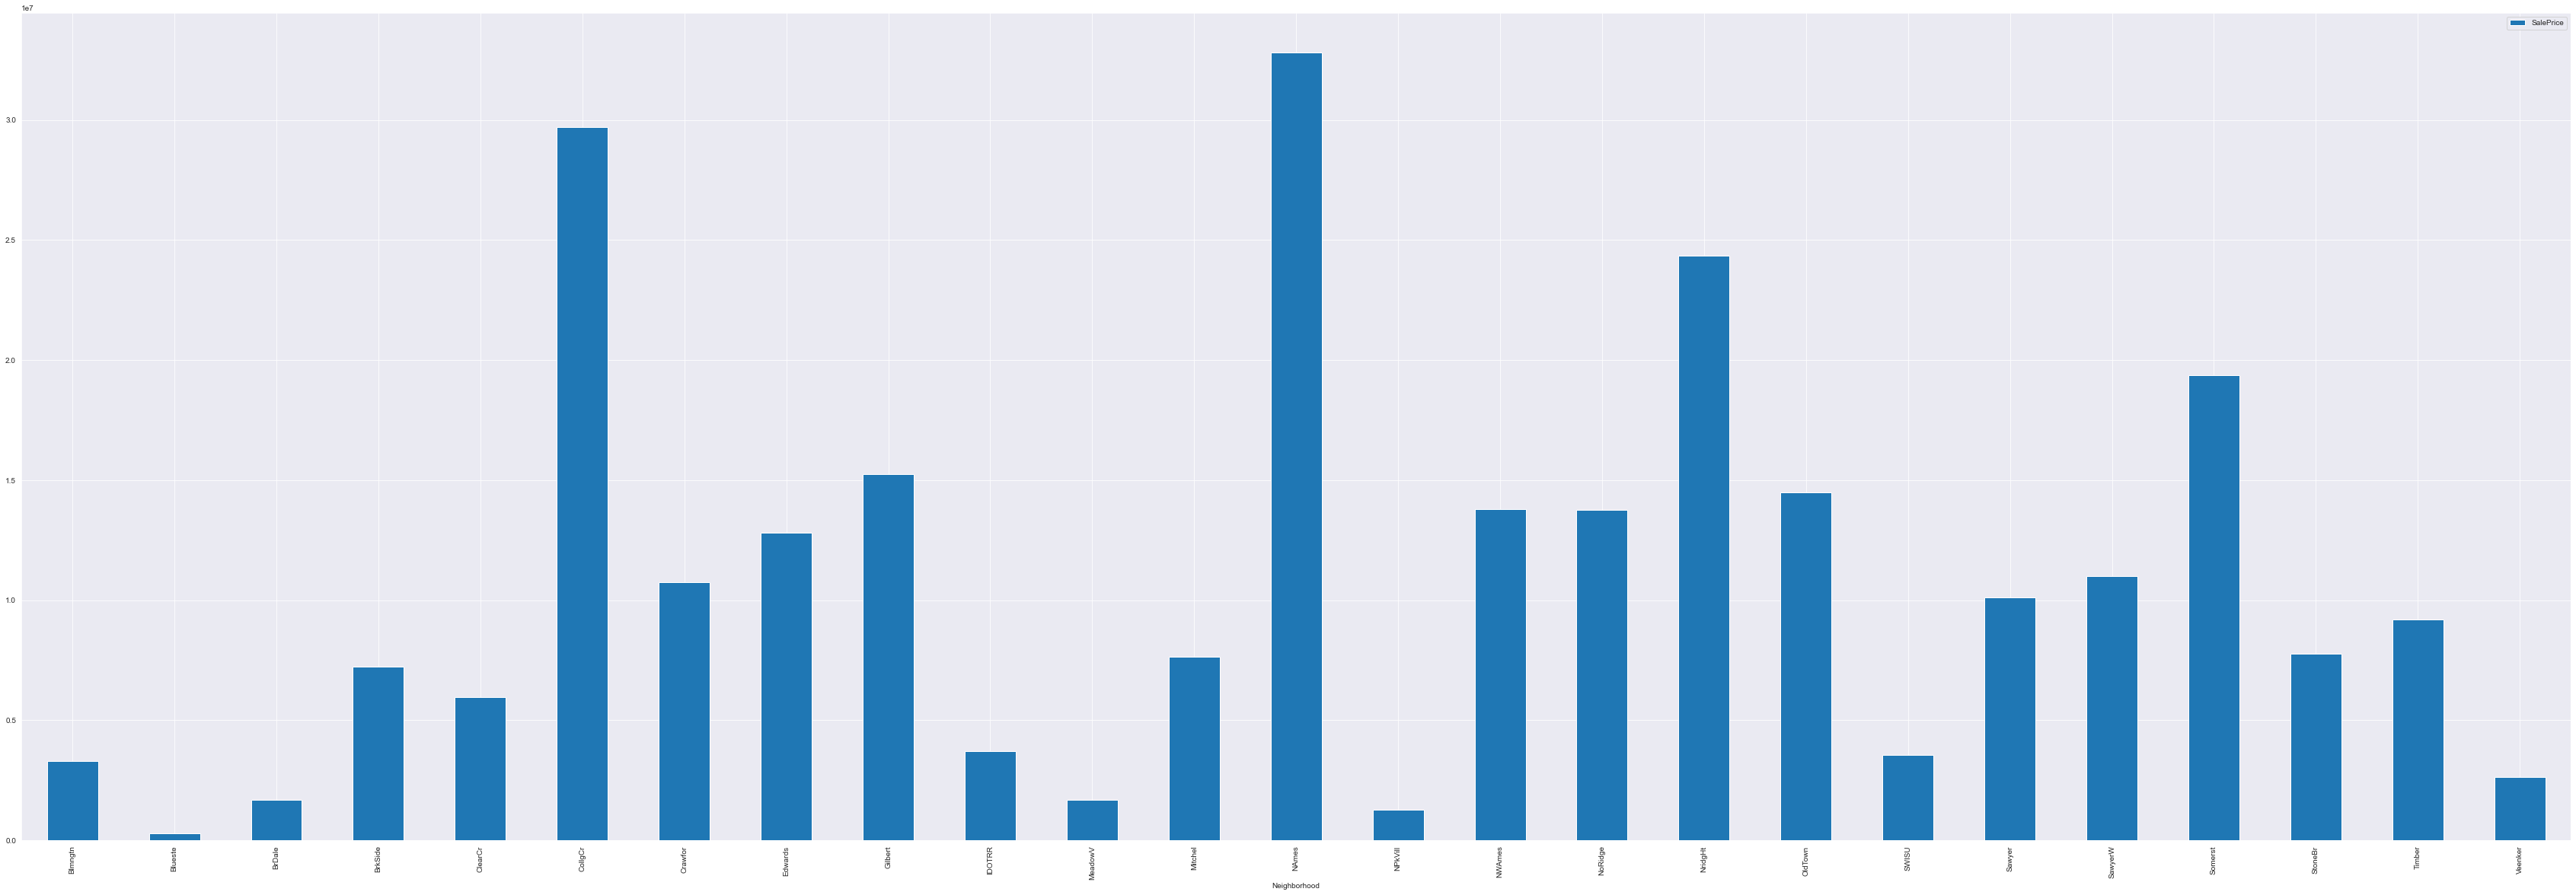

In [14]:
Neighborhood_SalePrice = train_data[['Neighborhood', 'SalePrice']].groupby(['Neighborhood']).sum().sort_values(by='Neighborhood', ascending=True)
Neighborhood_SalePrice.plot(kind='bar', figsize=(60, 20))
plt.show()

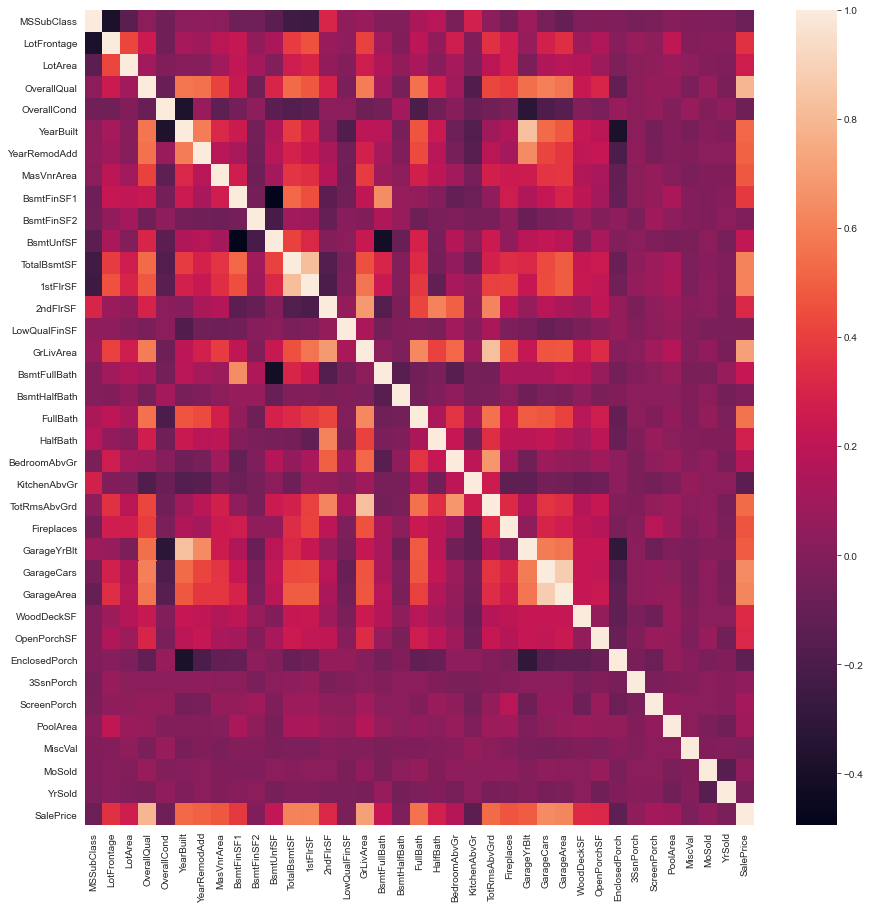

In [15]:
#多变量分析
corrs = train_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corrs)
plt.show()

处理后峰度： 0.12134661989685333
处理后偏度： 0.809519155707878


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


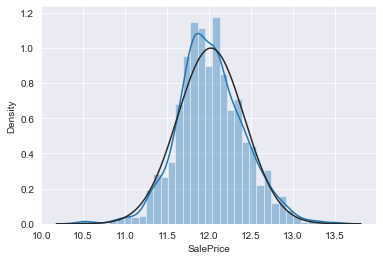

In [16]:
y = train_data['SalePrice']
y = np.log1p(y)
 
sns.distplot(y, fit=norm)
 
print('处理后峰度：',y.skew())
print('处理后偏度：',y.kurtosis())
plt.show()

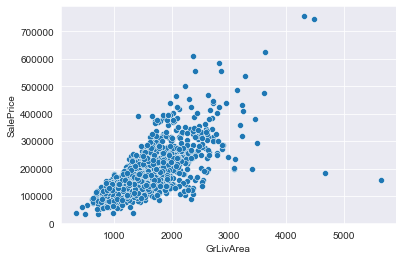

In [17]:
#处理异常值
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.show()

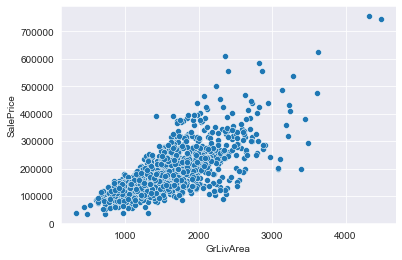

In [18]:
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<200000)].index)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.show()

In [19]:
train_nan = train_data.isnull().sum()
train_nan = train_nan.drop(train_nan[train_nan==0].index).sort_values(ascending=False)
print(train_nan)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [20]:
none_lists = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType1',
              'BsmtFinType2', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'MasVnrType']
for col in none_lists:
    train_data[col] = train_data[col].fillna('None')
    test_data[col] = test_data[col].fillna('None')

In [21]:
#填充众数
most_lists = ['MSZoning', 'Exterior1st', 'Exterior2nd', 'SaleType', 'KitchenQual', 'Electrical']
for col in most_lists:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    test_data[col] = test_data[col].fillna(train_data[col].mode()[0])    

In [22]:
#Functional填充Typ
train_data['Functional'] = train_data['Functional'].fillna('Typ')
test_data['Functional'] = test_data['Functional'].fillna('Typ')

In [23]:
zero_lists = ['GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageCars', 'GarageArea',
              'TotalBsmtSF']
for col in zero_lists:
    train_data[col] = train_data[col].fillna(0)
    test_data[col] = test_data[col].fillna(0)

In [24]:
train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))
for ind in test_data['LotFrontage'][test_data['LotFrontage'].isnull().values==True].index:
    x = test_data['Neighborhood'].iloc[ind]
    test_data['LotFrontage'].iloc[ind] = train_data.groupby('Neighborhood')['LotFrontage'].median()[x]

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
train_data = train_data.drop(['Utilities'], axis=1)
test_data = test_data.drop(['Utilities'], axis=1)

In [26]:
print(train_data.isnull().sum().max())
print(test_data.isnull().sum().max())

0
0


In [27]:
train_data['MSSubClass'] = train_data['MSSubClass'].apply(str)  # apply()函数默认对列进行操作
train_data['YrSold'] = train_data['YrSold'].astype(str)
train_data['MoSold'] = train_data['MoSold'].astype(str)
test_data['MSSubClass'] = test_data['MSSubClass'].apply(str)  
test_data['YrSold'] = test_data['YrSold'].astype(str)
test_data['MoSold'] = test_data['MoSold'].astype(str)

In [32]:
cate_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [36]:
#LabelEncoder编码

for col in cate_features:
    train_data[col] = train_data[col].astype(str)
    test_data[col] = test_data[col].astype(str)
cols = ['Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 
               'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir',
               'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
for col in cols:
    encoder = LabelEncoder()
    value_train = set(train_data[col].unique())
    value_test = set(test_data[col].unique())
    value_list = list(value_train | value_test)
    encoder.fit(value_list)
    train_data[col] = encoder.transform(train_data[col])
    test_data[col] = encoder.transform(test_data[col])

In [39]:
#把所有数据连上
all_data = pd.concat((train_data.drop('SalePrice', axis=1), test_data)).reset_index(drop=True)
#构造新特征
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] # 房屋总面积
all_data['OverallQual_TotalSF'] = all_data['OverallQual'] * all_data['TotalSF']  # 整体质量与房屋总面积交互项
all_data['OverallQual_GrLivArea'] = all_data['OverallQual'] * all_data['GrLivArea'] # 整体质量与地上总房间数交互项
all_data['OverallQual_TotRmsAbvGrd'] = all_data['OverallQual'] * all_data['TotRmsAbvGrd'] # 整体质量与地上生活面积交互项
all_data['GarageArea_YearBuilt'] = all_data['GarageArea'] * all_data['YearBuilt'] # 车库面积与建造时间交互项
all_data['IsRemod'] = 1 
all_data['IsRemod'].loc[all_data['YearBuilt']==all_data['YearRemodAdd']] = 0  #是否翻新(翻新：1， 未翻新：0)
all_data['BltRemodDiff'] = all_data['YearRemodAdd'] - all_data['YearBuilt']  #翻新与建造的时间差（年）

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [40]:
dummy_features = list(set(cate_features).difference(set(cols)))
all_data = pd.get_dummies(all_data, drop_first=True) 

In [41]:
trainset = all_data[:1458]
y = train_data['SalePrice']
trainset['SalePrice'] = y.values
testset = all_data[1458:]
trainset.to_csv('train_data.csv', index=False)
testset.to_csv('test_data.csv', index=False)
 
print('The shape of training data:', trainset.shape)
print('The shape of testing data:', testset.shape)

The shape of training data: (1458, 190)
The shape of testing data: (1459, 189)


<ipython-input-41-cfa2f5e38189>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['SalePrice'] = y.values


In [42]:
import numpy as np
import pandas as pd
import time
 
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
 
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))  # 限制浮点输出到小数点后3位

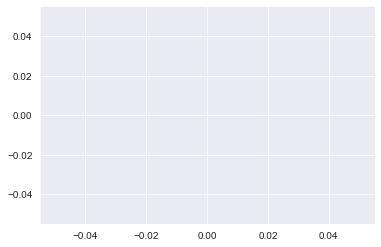

In [43]:
y_train = np.log1p(train_data.pop('SalePrice'))
 
#岭回归
alphas =np.logspace(-3,2,50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,train_data.values,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(alphas,test_scores)
plt.show()